Data analysis of the data

### prognosis

lieve=mild

death no in the test set

[intro video](https://covidcxr-hackathon.slack.com/files/U03010UC79D/F031AKQC3EJ/hackathon_presentation_v2.mp4) 

ensemble.AdaBoostClassifier

ensemble.BaggingClassifier

ensemble.RandomForestClassifier

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn import preprocessing

## Clinical data

In [2]:
data_path= r'TrainSet/trainClinData.xls'
df= pd.read_excel(data_path)
print(df.shape)
df.head()

(1103, 40)


,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death
0,82,P_102.png,A,72.000000,1,1.0,37.3,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,SEVERE,0
1,228,P_131.png,D,35.913889,0,1.0,39.3,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,MILD,0
2,229,P_132.png,D,57.266667,0,1.0,37.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,MILD,0
3,96,P_117.png,A,39.000000,1,1.0,37.2,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0
4,112,P_16.png,A,44.000000,0,1.0,38.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SEVERE,0


## Break

In [ ]:
df.select_dtypes("int64")
df.select_dtypes("float")

In [43]:
df_cat= df.select_dtypes('float')
df_cat['Sex']= df['Sex']
df_cat

,Age,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,Fibrinogen,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Sex
0,72.000000,1.0,37.3,3.0,1.0,0.0,5.37,4.58,3.96,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,35.913889,1.0,39.3,3.0,1.0,0.0,5.76,5.24,43.40,651.0,...,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0
2,57.266667,1.0,37.0,3.0,0.0,0.0,11.48,5.71,64.00,700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0
3,39.000000,1.0,37.2,2.0,1.0,0.0,10.17,3.45,0.75,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,44.000000,1.0,38.0,3.0,1.0,0.0,6.64,5.55,5.20,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,71.731691,1.0,38.0,NaN,1.0,1.0,0.47,3.43,26.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1099,89.106092,1.0,36.0,NaN,1.0,1.0,8.10,4.00,7.96,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1100,70.042437,1.0,37.2,NaN,1.0,1.0,5.13,4.90,10.10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1101,78.253251,1.0,37.0,NaN,1.0,0.0,7.14,5.14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
lista_malati= df['Prognosis']=='SEVERE'
lista_sani= df['Prognosis']=='MILD'
'''
for i in range(df_cat.shape[1]):
    #mean_malati= df_cat.iloc[i][lista_malati].mean()
    #mean_sani= df_cat.iloc[i][lista_sani].mean()
    #print(i)
    df_cat.iloc[i][0]
'''

In [39]:
lista_malati= df['Prognosis']=='SEVERE'
lista_sani= df['Prognosis']=='MILD'

lista_malati.sum() + lista_sani.sum()

1103

In [45]:
mean_malati= df_cat['Age'][lista_malati].mean()
mean_sani= df_cat['Age'][lista_sani].mean()

In [31]:
el_nan= list(df_cat.loc[pd.isna(df_cat["Age"]), :].index)

In [34]:
for k in range(len(el_nan)):
    if df['Prognosis'][el_nan[k]] == 'SEVERE':
        df_cat['Age'][el_nan[k]] = mean_malati
    else:
        df_cat['Age'][el_nan[k]] = mean_sani

C:\Users\Federico Cocchi\AppData\Local\Temp\ipykernel_31224\4252860380.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Age'][el_nan[k]] = mean_malati


In [53]:
# new approach
mean_value= []
for i in range(df_cat.shape[1]):
    mean= df_cat.iloc[i].mean()
    mean_value.append(mean)

In [57]:
values= {}

for counter, value in enumerate(df_cat.keys()):
    values[value] = mean_value[counter]
print(values)

{'Age': 16.763225806451615, 'PositivityAtAdmission': 52.84199588477367, 'Temp_C': 71.00022222222223, 'DaysFever': 16.002903225806453, 'Cough': 17.561999999999998, 'DifficultyInBreathing': 17.92413793103448, 'WBC': 68.15712962962964, 'RBC': 54.57896551724138, 'CRP': 21.442866666666667, 'Fibrinogen': 65.17515325670499, 'Glucose': 9.824561403508772, 'PCT': 128.18374999999997, 'LDH': 47.398782051282055, 'INR': 97.46513409961686, 'D_dimer': 88.13425925925927, 'Ox_percentage': 52.581149425287364, 'PaO2': 105.94619883040934, 'SaO2': 77.38116858237547, 'PaCO2': 123.69457777777778, 'pH': 35.45691570881226, 'CardiovascularDisease': 52.440440613026816, 'IschemicHeartDisease': 93.35366666666665, 'AtrialFibrillation': 51.62659003831418, 'HeartFailure': 45.042, 'Ictus': 31.755769230769236, 'HighBloodPressure': 10.70545893719807, 'Diabetes': 55.724427777777784, 'Dementia': 16.37064516129032, 'BPCO': 33.377584541062795, 'Cancer': 18.820967741935487, 'ChronicKidneyDisease': 24.701612903225808, 'Respira

In [58]:
df_final= df_cat.fillna(value=values)
df_final

,Age,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,WBC,RBC,CRP,Fibrinogen,...,HighBloodPressure,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Sex
0,72.000000,1.0,37.3,3.000000,1.0,0.0,5.37000,4.580000,3.960000,65.175153,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1
1,35.913889,1.0,39.3,3.000000,1.0,0.0,5.76000,5.240000,43.400000,651.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.683929,1.000000,0.000000,0
2,57.266667,1.0,37.0,3.000000,0.0,0.0,11.48000,5.710000,64.000000,700.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.683929,25.241935,0.000000,0
3,39.000000,1.0,37.2,2.000000,1.0,0.0,10.17000,3.450000,0.750000,65.175153,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
4,44.000000,1.0,38.0,3.000000,1.0,0.0,6.64000,5.550000,5.200000,65.175153,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,71.731691,1.0,38.0,16.002903,1.0,1.0,0.47000,3.430000,26.500000,65.175153,...,10.705459,55.724428,16.370645,33.377585,18.820968,24.701613,21.683929,25.241935,30.205161,0
1099,89.106092,1.0,36.0,16.002903,1.0,1.0,8.10000,4.000000,7.960000,65.175153,...,10.705459,55.724428,16.370645,33.377585,18.820968,24.701613,21.683929,25.241935,30.205161,0
1100,70.042437,1.0,37.2,16.002903,1.0,1.0,5.13000,4.900000,10.100000,65.175153,...,10.705459,55.724428,16.370645,33.377585,18.820968,24.701613,21.683929,25.241935,30.205161,1
1101,78.253251,1.0,37.0,16.002903,1.0,0.0,7.14000,5.140000,21.442867,65.175153,...,10.705459,55.724428,16.370645,33.377585,18.820968,24.701613,21.683929,25.241935,30.205161,1


In [ ]:
df_final.info()

In [ ]:
for i in range(df_cat.shape[1]):
    o= df_cat.iloc[i]
    print(o)

## Continue

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Row_number             1103 non-null   int64  
 1   ImageFile              1103 non-null   object 
 2   Hospital               1103 non-null   object 
 3   Age                    1102 non-null   float64
 4   Sex                    1103 non-null   int64  
 5   PositivityAtAdmission  1064 non-null   float64
 6   Temp_C                 943 non-null    float64
 7   DaysFever              859 non-null    float64
 8   Cough                  1098 non-null   float64
 9   DifficultyInBreathing  1099 non-null   float64
 10  WBC                    1083 non-null   float64
 11  RBC                    1057 non-null   float64
 12  CRP                    1059 non-null   float64
 13  Fibrinogen             272 non-null    float64
 14  Glucose                903 non-null    float64
 15  PCT 

In [ ]:
df.CRP.isnull().values.any()

In [ ]:
df.CRP.isnull().sum()

In [23]:
np.unique(df.Cough, return_counts=True)

(array([ 0.,  1., nan]), array([524, 574,   5], dtype=int64))

- Row_number: metto in ordine le righe (per cosa mi serve?)
- ImageFile: nome dell'immagine
- Hospital: 1-6 diversi ospedali --> non serve per la predizione 
- Age: lasciarla così --> 1 nan
- Sex: 0 – male, 1 – female
- PositivityAtAdmission: 0: negativo,1: positivo --> nan
- Temp_C: 160 nan
- DaysFever: 244 nan
- Cough: 5 nan
- DifficultyInBreathing: 4 nan
- WBC: 20 nan
- RBC: 46 nan
- CRP: 44 nan

In [7]:
np.unique(df.Death, return_counts=True)

(array([0, 1], dtype=int64), array([910, 193], dtype=int64))

In [6]:
# balanced dataset on the object class
np.unique(df.Prognosis, return_counts=True)

(array(['MILD', 'SEVERE'], dtype=object), array([535, 568], dtype=int64))

In [13]:
le = preprocessing.LabelEncoder()
binarial_Prognosis=le.fit_transform(df.Prognosis)
le.classes_

array(['MILD', 'SEVERE'], dtype=object)

In [12]:
df_order= df.sort_values(by=['Row_number'])
df_order

,Row_number,ImageFile,Hospital,Age,Sex,PositivityAtAdmission,Temp_C,DaysFever,Cough,DifficultyInBreathing,...,Diabetes,Dementia,BPCO,Cancer,ChronicKidneyDisease,RespiratoryFailure,Obesity,Position,Prognosis,Death
286,1,P_1.png,A,38.000000,0,1.0,36.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0
879,2,P_33.png,A,49.000000,0,1.0,37.5,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SEVERE,0
343,3,P_44.png,A,41.000000,0,1.0,36.0,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0
105,4,P_55.png,A,67.000000,0,1.0,36.7,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,SEVERE,0
428,5,P_66.png,A,39.000000,1,1.0,37.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MILD,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1112,P_2_118.png,C,82.127310,1,1.0,36.8,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEVERE,0
535,1113,P_2_119.png,C,76.279261,1,1.0,36.2,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEVERE,1
1089,1114,P_2_120.png,C,58.598220,1,1.0,38.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEVERE,1
1095,1115,P_2_121.png,C,78.335387,0,1.0,38.0,NaN,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEVERE,1


In [ ]:
df_order.reset_index(inplace=True, drop=True)

In [ ]:
df_order

In [14]:
np.unique(df.Row_number)

array([   1,    2,    3, ..., 1114, 1115, 1116], dtype=int64)

## X-rays images

open the different images and NORMALIZATION

In [3]:
import torchvision.transforms as transforms
import torch
from PIL import Image
import matplotlib.pyplot as plt

In [18]:
tran= transforms.Compose([
    #transforms.ToPILImage(),
    transforms.ToTensor()
])

In [19]:
img= Image.open(r'TrainSet\TrainSet\P_1.png')
img= tran(img).float()
img.shape

torch.Size([1, 3520, 4280])

In [22]:
torch.max(img)

tensor(1023.)

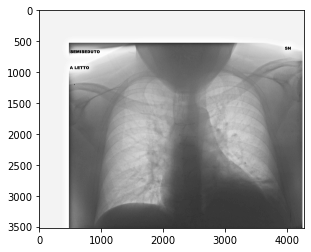

In [23]:
plt.imshow( img.permute(1, 2, 0), cmap='gray' )

In [ ]:
torch.unique(img)

In [25]:
mean= torch.mean(img)
std= torch.std(img)
print(mean, std)

tensor(675.8432) tensor(231.7435)


In [26]:
norm= transforms.Normalize(mean, std)
img_norm= norm(img)
img_norm

tensor([[[1.3168, 1.3168, 1.3168,  ..., 1.3168, 1.3168, 1.3168],
         [1.3168, 1.3168, 1.3168,  ..., 1.3168, 1.3168, 1.3168],
         [1.3168, 1.3168, 1.3168,  ..., 1.3168, 1.3168, 1.3168],
         ...,
         [1.3168, 1.3168, 1.3168,  ..., 1.4980, 1.4937, 1.4937],
         [1.3168, 1.3168, 1.3168,  ..., 1.4980, 1.4937, 1.4937],
         [1.3168, 1.3168, 1.3168,  ..., 1.4980, 1.4937, 1.4937]]])

torch.Size([1, 3520, 4280])


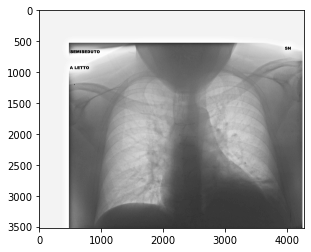

In [27]:
print(img_norm.shape)
plt.imshow( img_norm.permute(1, 2, 0), cmap='gray' )

In [41]:
img_norm.min()

tensor(-2.6633)

In [29]:
data= (img_norm - img_norm.min()) / img_norm.max()
data

tensor([[[2.4513, 2.4513, 2.4513,  ..., 2.4513, 2.4513, 2.4513],
         [2.4513, 2.4513, 2.4513,  ..., 2.4513, 2.4513, 2.4513],
         [2.4513, 2.4513, 2.4513,  ..., 2.4513, 2.4513, 2.4513],
         ...,
         [2.4513, 2.4513, 2.4513,  ..., 2.5723, 2.5694, 2.5694],
         [2.4513, 2.4513, 2.4513,  ..., 2.5723, 2.5694, 2.5694],
         [2.4513, 2.4513, 2.4513,  ..., 2.5723, 2.5694, 2.5694]]])

In [30]:
data= torch.nn.functional.normalize(img_norm)
data

tensor([[[0.0169, 0.0169, 0.0169,  ..., 0.0152, 0.0152, 0.0152],
         [0.0169, 0.0169, 0.0169,  ..., 0.0152, 0.0152, 0.0152],
         [0.0169, 0.0169, 0.0169,  ..., 0.0152, 0.0152, 0.0152],
         ...,
         [0.0169, 0.0169, 0.0169,  ..., 0.0173, 0.0172, 0.0172],
         [0.0169, 0.0169, 0.0169,  ..., 0.0173, 0.0172, 0.0172],
         [0.0169, 0.0169, 0.0169,  ..., 0.0173, 0.0172, 0.0172]]])

In [31]:
data.min()

tensor(-0.0422)

Normalization for all the images

In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(), # non sono sicuro di questo
    transforms.ToTensor()
])

dataset = '' # leggere/aprire i dati
means = []
stds = []
for img, _ in dataset:
    means.append(torch.mean(img))
    stds.append(torch.std(img))
mean= torch.mean(torch.tensor(means))
std= torch.mean(torch.tensor(stds))

print(mean, std)

In [ ]:
my_trans= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

After that we have our dataset and we can start with training and augmentation

### Contrasto

In [8]:
tran= transforms.Compose([
    #transforms.ToPILImage(),
    transforms.ToTensor()
])

In [27]:
img= Image.open(r'TrainSet\TrainSet\P_1.png')

In [ ]:
img= tran(img)
img.shape

In [13]:
# invertire la scala di grigi
img= img*-1 + 255

In [ ]:
plt.imshow(img.permute(1, 2, 0), cmap='gray' )

In [29]:
contrast = ImageEnhance.Contrast(img)
contrast.enhance(2).show()

ValueError: image has wrong mode

ValueError: image has wrong mode

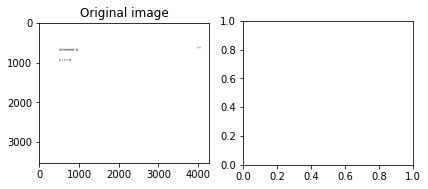

In [24]:
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance, ImageStat

# Read image, set up factor
image = img
factor = 0.25

# ImageEnhance
br_enhancer = ImageEnhance.Brightness(image)
cl_enhancer = ImageEnhance.Color(image)
cn_enhancer = ImageEnhance.Contrast(image)

# Rebuild ImageEnhance.Brightness on-the-fly
br_image_pre = Image.new(image.mode, image.size, 0)
#br_image = Image.blend(br_image_pre, image, factor)

# Rebuild ImageEnhance.Color on-the-fly
cl_image_pre = image.convert('L').convert('RGB')
#cl_image = Image.blend(cl_image_pre, image, factor)

# Rebuild ImageEnhance.Contrast on-the-fly
mean = int(ImageStat.Stat(image.convert('L')).mean[0] + 0.5)
cn_image_pre = Image.new('L', image.size, mean).convert(image.mode)
#cn_image = Image.blend(cn_image_pre, image, factor)

# Visualization
plt.figure(1, figsize=(14, 9))
plt.subplot(3, 4, 1), plt.imshow(image), plt.title('Original image')
plt.subplot(3, 4, 2), plt.imshow(br_enhancer.enhance(factor)), plt.title('ImageEnhance.Brightness(0.25)')
plt.subplot(3, 4, 3), plt.imshow(cl_enhancer.enhance(factor)), plt.title('ImageEnhance.Color(0.25)')
plt.subplot(3, 4, 4), plt.imshow(cn_enhancer.enhance(factor)), plt.title('ImageEnhance.Contrast(0.25)')
plt.subplot(3, 4, 5), plt.imshow(image), plt.title('Original image (0.25)')
plt.subplot(3, 4, 6), plt.imshow(br_image_pre), plt.title('+ brightness modified image (0.75)')
plt.subplot(3, 4, 7), plt.imshow(cl_image_pre), plt.title('+ color modified image (0.75)')
plt.subplot(3, 4, 8), plt.imshow(cn_image_pre), plt.title('+ contrast modified image (0.75)')
#plt.subplot(3, 4, 10), plt.imshow(br_image), plt.title('= rebuilt ImageEnhance.Brightness(0.25)')
#plt.subplot(3, 4, 11), plt.imshow(cl_image), plt.title('= rebuilt ImageEnhance.Color(0.25)')
#plt.subplot(3, 4, 12), plt.imshow(cn_image), plt.title('= rebuilt ImageEnhance.Contrast(0.25)')
plt.tight_layout()
plt.show()